In [23]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext tensorboard

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from datetime import datetime

pd.set_option('mode.chained_assignment', None)
sn.set(rc={'figure.figsize':(9,9)})
sn.set(font_scale=1.4)

# !pip install pydot
!rm -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Working with Tensorflow 2.0


[**TensorFlow**](https://www.tensorflow.org/) is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML-powered applications.

TensorFlow library is a free and open-source software library for *dataflow* (dataflow programming is a programming paradigm that models a program as a directed graph of the data flowing between operations, thus implementing dataflow principles and architecture) and *differentiable programming* (Differentiable programming is a programming paradigm in which the programs can be differentiated throughout, usually via automatic differentiation. This allows for gradient based optimization of parameters in the program, often via gradient descent.) across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks. It is used for both research and production at Google.

TensorFlow was originally developed by researchers and engineers working on the Google Brain team within Google's Machine Intelligence Research organization to conduct machine learning and deep neural networks research. The system is general enough to be applicable in a wide variety of other domains, as well. It is one of the most popular libaries for machine learning with neural networks.

TensorFlow provides stable Python and C++ APIs, as well as non-guaranteed backward compatible API for other languages.

### Tensorflow tensors

A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes (similar to `numpy.ndarray`).

When we write a TensorFlow program, we mainly operate and pass around `tf.Tensor` objects, which represents a partially defined data object that will eventually produce a value. In a Tensorflow program, we specify how these `tf.Tensor`'s link into a computation graph. We can then run the computation graph to get the output (based on an input), and use differential properties of the graph to optomise for parameter (`tf.Tensor` nodes) in the program.


In [41]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)
print('Tensorflow 2.0, executing early by default : Are we evaluating operations immediately ? {}'.format(tf.executing_eagerly()))

x = tf.constant(2, name='x') # Example showing how to use the graph structure to multiply two numbers together
y = tf.constant(3, name='y')
z = x * y

print('z = {} = x ({}) * y ({})'.format(z, x, y))

TensorFlow version:  2.1.0
Tensorflow 2.0, executing early by default : Are we evaluating operations immediately ? True
z = 6 = x (2) * y (3)


In [ ]:
# Code example showing how to optimse the graph to learn X parameters for instance (Some sort of root finding equation we could easily model here)

The `tf.Tensor` has the same data type `tf.Dtype` (e.g. {`int32`, `float32`, `string`}) for each element. There are some special types of tensors, such as `tf.Variable`, `tf.constant`, `tf.SparseTensor`, `tf.placeholder`. The data of a tensor is immutable, meaning that in a single run of the graph the data doesn't change.

Depending on the dimension of the tensor, we get the following

|Dimension|Classical mathematical form|
|---|---|
| 0       | Scalar                    |
| 1       | Vector                    |
| 2       | Matrix                    |
| 3       | 3-Tensor                  |
| n       | n-Tensor                  |

In [ ]:
import tensorflow as tf
number = tf.Variable()



# Variables

# Eager execution

# Ragged tensor ?

# Create an op

# Struture it all


dir(number)

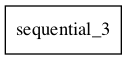

In [8]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

model.add(layers.Dense(64, activation='relu'))
# Add another:
model.add(layers.Dense(64, activation='relu'))
# Add an output layer with 10 output units:
model.add(layers.Dense(10))

tf.keras.utils.plot_model(
    model
)


In [18]:
# Helper functions for TF Graph visualization
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def=None, max_const_size=32):
    """Visualize TensorFlow graph."""
    
    # If no input graph is given, get the default graph
    if graph_def is None:
        graph_def = tf.get_default_graph().as_graph_def()
        
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [19]:
# tf.reset_default_graph()  # To clear the default graph 

W = tf.Variable([.3], tf.float32, name="W")
b = tf.Variable([-.3], tf.float32, name="b")


show_graph()

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [31]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.1.0


In [32]:
from tensorflow import keras

# Define the model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [33]:
(train_images, train_labels), _ = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0

In [34]:
from datetime import datetime

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model.fit(
    train_images,
    train_labels, 
    batch_size=64,
    epochs=5, 
    callbacks=[tensorboard_callback])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.6752 - accuracy: 0.7659
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4878 - accuracy: 0.8311
Epoch 3/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4464 - accuracy: 0.8425
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4246 - accuracy: 0.8496
Epoch 5/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4093 - accuracy: 0.8528


In [35]:
%tensorboard --logdir %logs

Reusing TensorBoard on port 6006 (pid 61206), started 0:02:25 ago. (Use '!kill 61206' to kill it.)